## Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?


## Packages 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

## Dataset

In [15]:
# loading the dataset
data = np.loadtxt("data/ex1data1.txt", delimiter=',')
x_train = data[:,0]
y_train = data[:,1]

In [16]:
# x_train - # population of a city
print("Type of x_train:",type(x_train)) 
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


In [17]:
# print y_train - profit of a restaurant in that city
print("Type of y_train:",type(y_train)) 
print("First five elements of y_train are:\n", y_train[:5])  

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


In [18]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


## Visualizations

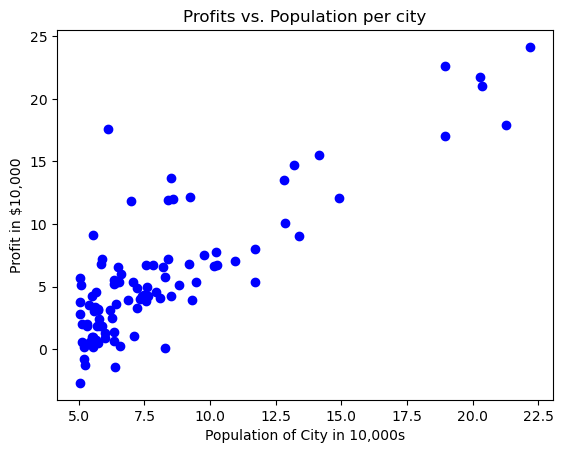

<Figure size 640x480 with 0 Axes>

In [19]:
plt.scatter(x_train, y_train, c='b') 


plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()
plt.savefig("assets/dataset.png")

## Model

In [20]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression to fit the data points in x and y
    """

    m = x.shape[0] 
    total_cost = 0
    
    f = 0
    for i in range(m):
        f = w * x[i] + b
        cost = (f - y[i])**2
        total_cost += cost
    total_cost = total_cost / (2*m)
    
    return total_cost

In [21]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        j_w = (f_wb - y[i]) * x[i]
        j_b = f_wb - y[i]
        
        dj_dw += j_w
        dj_db += j_b
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
        
    return dj_dw, dj_db

In [22]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    m = len(x)
    
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        if i<100000:
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [23]:
initial_w = 0.
initial_b = 0.

iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [24]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

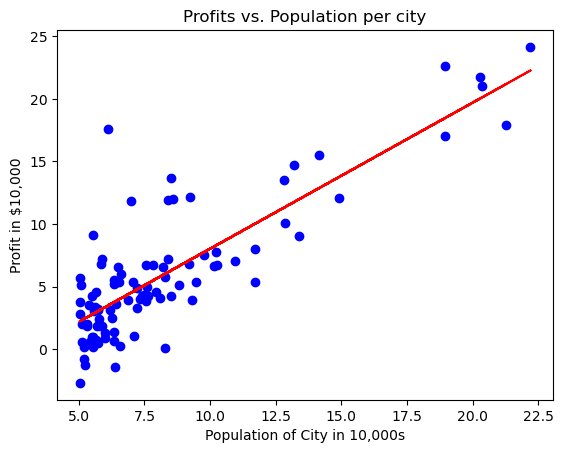

In [25]:
plt.plot(x_train, predicted, c = "r")

plt.scatter(x_train, y_train, c='b') 

plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.savefig("assets/output.png")

Let's predict what the profit would be in areas of 35,000 and 70,000 people. 

In [26]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
